# Illustration of the Law of Large numbers and the central limit theorem

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, we demonstrate the law of large numbers and the central limit theorem. To recall them:

** Theorem ** (Law of large numbers) Let $X_1, X_2,\dots$ be independent, identically distributed random variables with finite expectation $\mu$. Then we have

$$ \frac{1}{n}\sum_{i=1}^nX_i\to \mu $$

almost surely.

** Theorem ** (Central limit theorem) Let $X_1, X_2,\dots$ be independent, identically distributed random variables with finite second moments, expectation $\mu$ and standard deviation $\sigma$. Then we have

$$ \frac{1}{\sqrt{n}\sigma}\sum_{i=1}^n(X_i-\mu)\to \mathcal{N}(0,1) $$,

in distribution, where $\mathcal{N}(0,1)$ is a standard normal random variable.

## Law of large numbers

Let us first view this when the $X_i$ are standard normals themselves.

### Standard normal random variables

In [66]:
X = np.random.randn(1000)
S = np.cumsum(X)
avg = S / np.arange(1,len(S)+1)

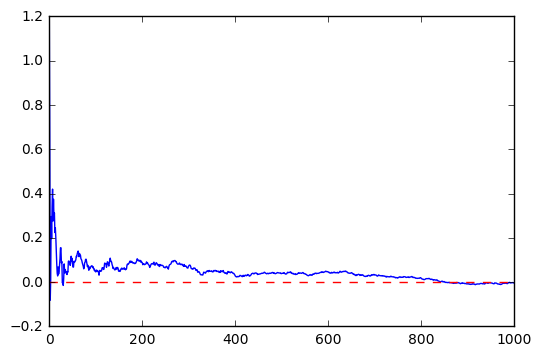

In [67]:
plt.plot(np.arange(len(avg)), avg, 'b')
plt.plot(np.arange(len(avg)), np.zeros(len(avg)), 'r--')
plt.show()

### Non-centered Gaussian

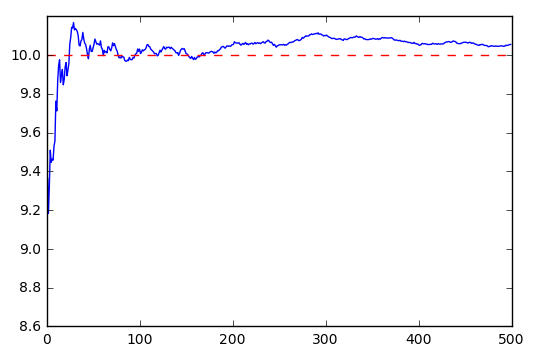

In [73]:
X = np.random.randn(500) + 10
S = np.cumsum(X)
avg = S / np.arange(1,len(S)+1)

plt.plot(np.arange(len(avg)),avg, 'b')
plt.plot(np.arange(len(avg)), 10 * np.ones(len(avg)), 'r--')
plt.show()

### Exponential random variables

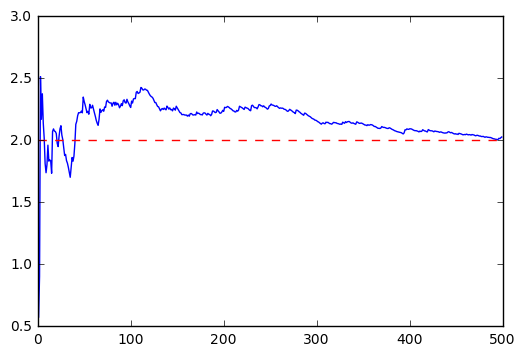

In [78]:
X = np.random.exponential(2, 500)
S = np.cumsum(X)
avg = S / np.arange(1,len(S)+1)

plt.plot(np.arange(len(avg)),avg, 'b')
plt.plot(np.arange(len(avg)), 2 * np.ones(len(avg)), 'r--')
plt.show()

### Standard Cauchy

This is a random variable with density function 

$$f(x)=\frac{1}{\pi(1+x^2)}$$

This distribution does not have a mean as $\mathbb{E}|X|=\infty$ (check it!)

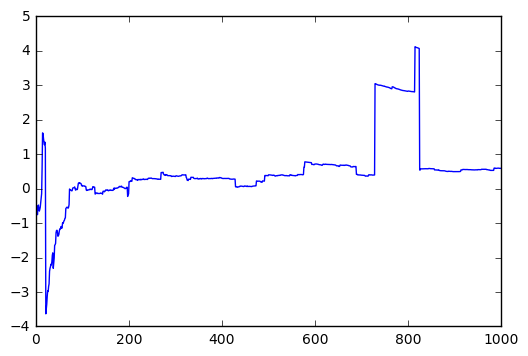

In [83]:
X = np.random.standard_cauchy(1000)
S = np.cumsum(X)
avg = S / np.arange(1,len(S)+1)

plt.plot(np.arange(len(avg)),avg, 'b')
plt.show()

## Central limit theorem

### Standard normals

In [153]:
sample_size = 1000

clt = [np.cumsum(np.random.randn(1000)) / np.sqrt(np.arange(1,1000+1)) \
       for i in range(sample_size)]

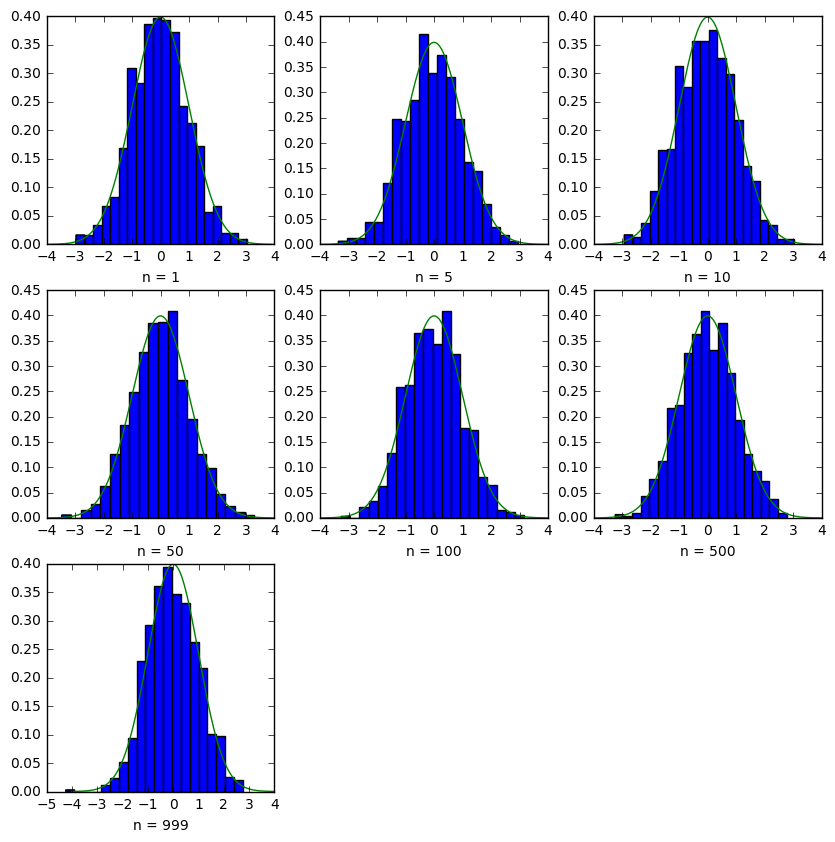

In [158]:
from scipy.stats import norm # standard normal distribution

fig = plt.figure(figsize = (10,10))

ns = [1, 5, 10, 50, 100, 500, 999 ]

for i, el in enumerate(ns):
    plt.subplot(3,3,i+1)
    plt.hist([clt[j][el] for j in range(sample_size)], bins = 20, normed = True);
    plt.plot(np.linspace(-4,4,1000), norm.pdf(np.linspace(-4, 4, 1000),0,1),'g')
    plt.xlabel("n = {}".format(el))
    
plt.show()

All of them fit the standard normal distribution, which is not surprising as a linear combination of i.i.d normals is a normal themselves.

### Bernoulli (The DeMoivre-Laplace theorem)

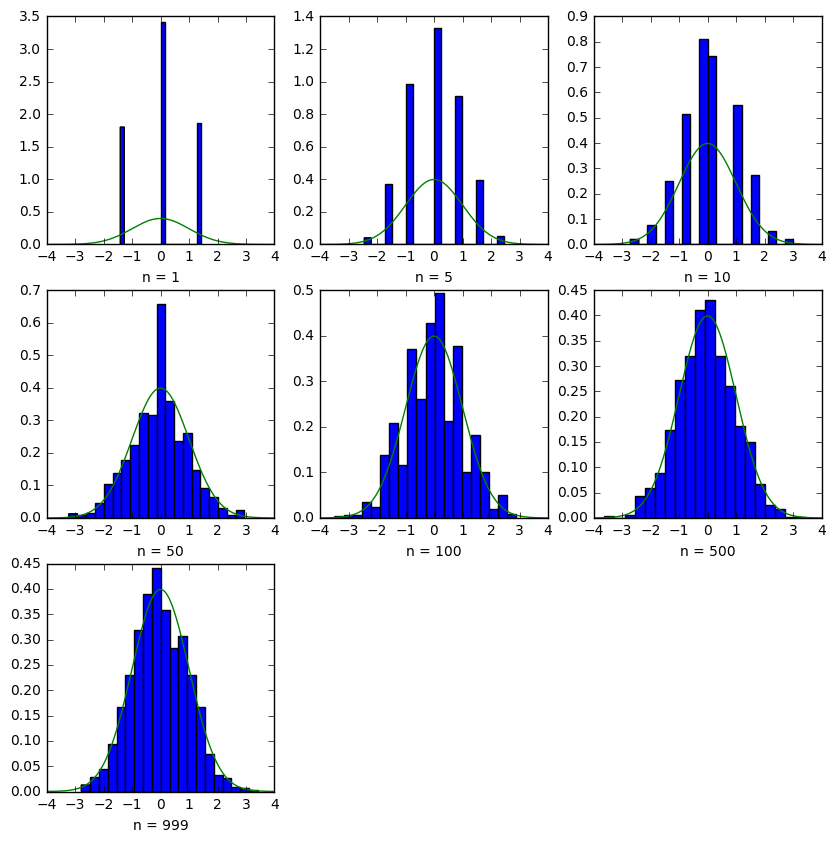

In [178]:
sample_size = 1000

clt = [np.cumsum(np.random.binomial(1,0.5,1000)-0.5) / (0.5 * np.sqrt(np.arange(1,1000+1))) \
       for i in range(sample_size)]

fig = plt.figure(figsize = (10,10))

for i, el in enumerate(ns):
    plt.subplot(3,3,i+1)
    plt.hist([clt[j][el] for j in range(sample_size)], bins = 20, normed = True);
    plt.plot(np.linspace(-4,4,1000), norm.pdf(np.linspace(-4, 4, 1000),0,1),'g')
    plt.xlabel("n = {}".format(el))
    
plt.show()

### Exponential

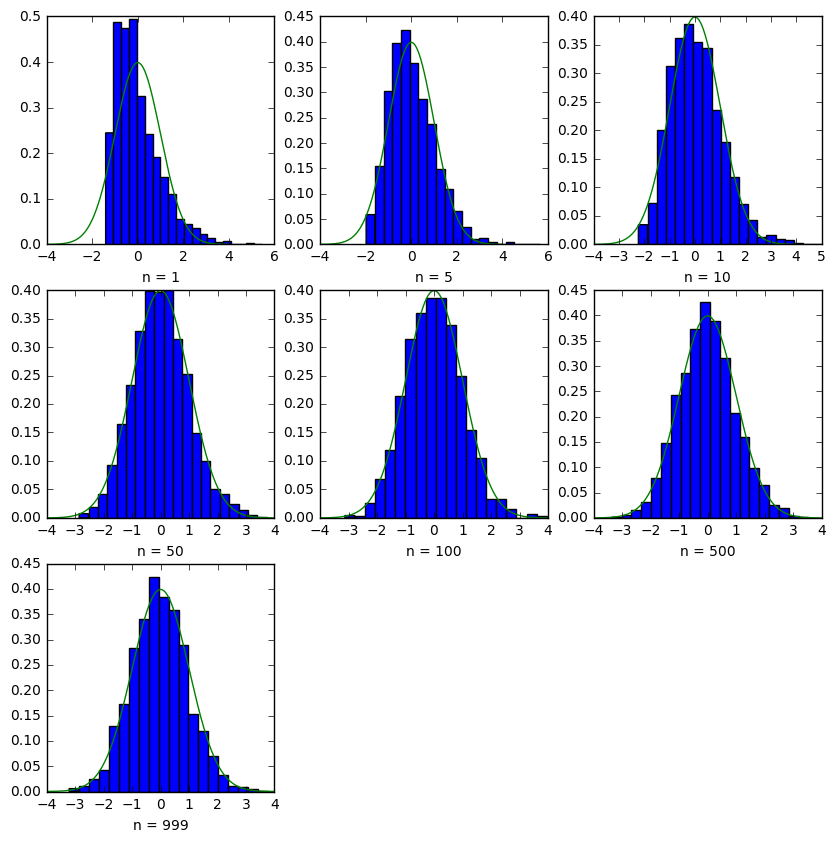

In [165]:
sample_size = 1000

clt = [np.cumsum(np.random.exponential(2, 1000)-2) / (2 * np.sqrt(np.arange(1,1000+1))) \
       for i in range(sample_size)]

fig = plt.figure(figsize = (10,10))

for i, el in enumerate(ns):
    plt.subplot(3,3,i+1)
    plt.hist([clt[j][el] for j in range(sample_size)], bins = 20, normed = True);
    plt.plot(np.linspace(-4,4,1000), norm.pdf(np.linspace(-4, 4, 1000),0,1),'g')
    plt.xlabel("n = {}".format(el))
    
plt.show()

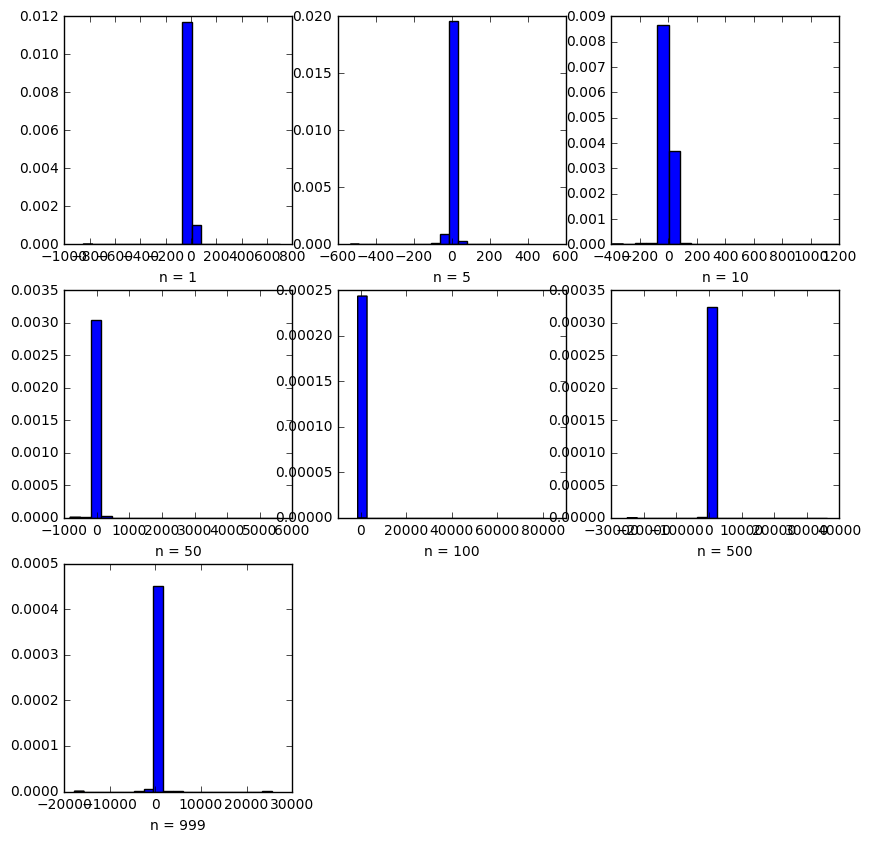

In [168]:
### Standard Cauchy
sample_size = 1000

clt = [np.cumsum(np.random.standard_cauchy(1000)) /  np.sqrt(np.arange(1,1000+1)) \
       for i in range(sample_size)]

fig = plt.figure(figsize = (10,10))

for i, el in enumerate(ns):
    plt.subplot(3,3,i+1)
    plt.hist([clt[j][el] for j in range(sample_size)], bins = 20, normed = True);
    plt.xlabel("n = {}".format(el))
    
plt.show()

While most of the distribution concentrates around zero, we have extreme large values often. This is a consequence of the heavy tail of the Cauchy distribution.